In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from pandas_profiling import ProfileReport

# With missforest we can use random forest to impute data. This is better than mean by far
# to avoid errors on loading missingpy
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics

# Model to apply
import xgboost as xgb # need to set manually what variables are categorical

# load stored data from data_imputation
%store -r train_final
%store -r test_final
train_df = train_final.copy()
test_df = test_final.copy()


Bad key figure.labelsize in file /Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/classic 2.mplstyle, line 310 ('figure.labelsize:   medium    # size of the figure label')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key figure.labelweight in file /Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/classic 2.mplstyle, line 311 ('figure.labelweight: normal    # weight of the figure label')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution


## Training & validation with lightgbm

In [2]:
# getting ready x and y variables
x = train_df.drop(['Id','SalePrice'],axis=1)
y = train_df.SalePrice

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [4]:
# build the lightgbm model

val_model = xgb.XGBRegressor(learning_rate = 0.09, max_depth = 5, random_state = 1) # lgb.LGBMClassifier() or LGBMRanker()
val_model.fit(x_train,y_train,eval_set=[(x_train,y_train), (x_test,y_test)],
          eval_metric='rmse')

[0]	validation_0-rmse:179615.61869	validation_1-rmse:183448.94024
[1]	validation_0-rmse:164320.48198	validation_1-rmse:168623.28145
[2]	validation_0-rmse:150377.78623	validation_1-rmse:155288.22693
[3]	validation_0-rmse:137718.16303	validation_1-rmse:143106.66428
[4]	validation_0-rmse:126145.02590	validation_1-rmse:131915.31217
[5]	validation_0-rmse:115618.19665	validation_1-rmse:121898.60741
[6]	validation_0-rmse:106019.55936	validation_1-rmse:112669.14771
[7]	validation_0-rmse:97275.95149	validation_1-rmse:104361.90978
[8]	validation_0-rmse:89320.67773	validation_1-rmse:96773.86893
[9]	validation_0-rmse:82072.43560	validation_1-rmse:90243.81827
[10]	validation_0-rmse:75441.04699	validation_1-rmse:84265.55373
[11]	validation_0-rmse:69434.13361	validation_1-rmse:78854.49371
[12]	validation_0-rmse:63915.78412	validation_1-rmse:73739.58209
[13]	validation_0-rmse:58903.95900	validation_1-rmse:69190.79948
[14]	validation_0-rmse:54373.71256	validation_1-rmse:65368.31679
[15]	validation_0-rm

/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:32132.61903	validation_1-rmse:46514.86964
[22]	validation_0-rmse:30007.99460	validation_1-rmse:44889.63954
[23]	validation_0-rmse:28072.03708	validation_1-rmse:43494.20593
[24]	validation_0-rmse:26309.58523	validation_1-rmse:42377.78297
[25]	validation_0-rmse:24703.90396	validation_1-rmse:41176.16728
[26]	validation_0-rmse:23262.18321	validation_1-rmse:40097.47363
[27]	validation_0-rmse:21958.76759	validation_1-rmse:39303.51429
[28]	validation_0-rmse:20788.16833	validation_1-rmse:38439.30811
[29]	validation_0-rmse:19767.61732	validation_1-rmse:37597.16523
[30]	validation_0-rmse:18824.08610	validation_1-rmse:37044.29669
[31]	validation_0-rmse:17997.61284	validation_1-rmse:36424.43369
[32]	validation_0-rmse:17184.50323	validation_1-rmse:36020.02610
[33]	validation_0-rmse:16455.62165	validation_1-rmse:35698.64136
[34]	validation_0-rmse:15750.26414	validation_1-rmse:35104.36795
[35]	validation_0-rmse:15144.50356	validation_1-rmse:34714.33897
[36]	validation_0-rmse:14

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [6]:
print('Training accuracy {:.4f}'.format(val_model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(val_model.score(x_test,y_test)))

Training accuracy 0.9911
Testing accuracy 0.8705


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

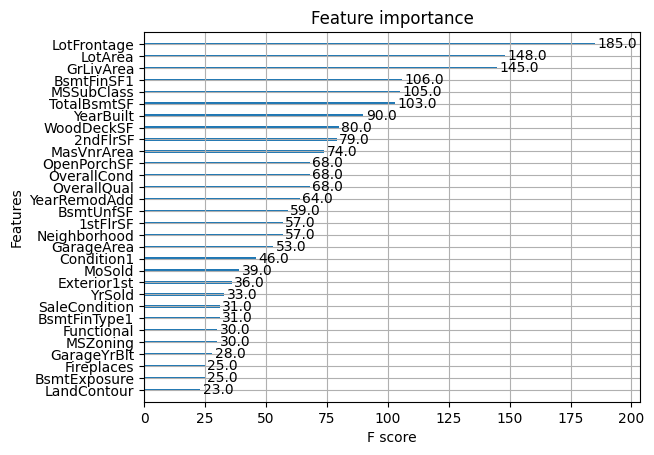

In [7]:
xgb.plot_importance(val_model, max_num_features = 30)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

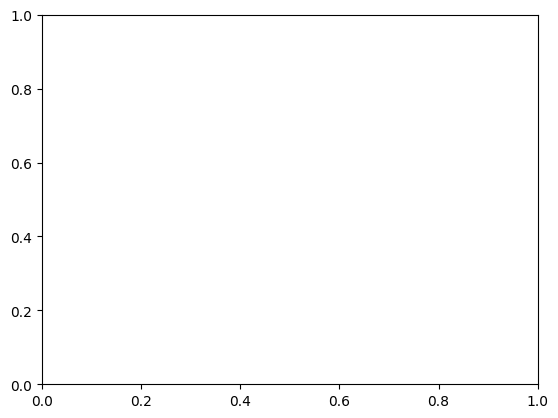

In [10]:
xgb.plot_tree(val_model)


## Submission with the validation model.

In [11]:
# making predictions
val_predictions = pd.DataFrame(val_model.predict(test_df.drop('Id', axis = 1)))

#merging predictions with the full data set
val_submission = pd.merge(test_df['Id'].astype(int),
                          val_predictions,
                          left_index = True,
                          right_index = True)
val_submission.rename(columns = {0: 'SalePrice'}, inplace = True)

# save to csv
val_submission.to_csv('../csv_data/val_submission_xgboost.csv',
                  header = True, index = False)

## Full model submission

Once we have validated the model splitting train and test we are going to train the final model with all the train data we have. 

In [12]:
#training model with the whole dataset
model = xgb.XGBRegressor(learning_rate = 0.09, max_depth = 5, random_state = 1) # lgb.LGBMClassifier() or LGBMRanker()
model.fit(x, y, eval_metric='rmse')

# making predictions
predictions = pd.DataFrame(model.predict(test_df.drop('Id', axis = 1)))


/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [13]:
#merging predictions with the full data set
submission = pd.merge(test_df['Id'].astype(int),
                          predictions,
                          left_index = True,
                          right_index = True)
submission.rename(columns = {0: 'SalePrice'}, inplace = True)

In [10]:
# save to csv
submission.to_csv('../csv_data/submission_xgboost.csv',
                  header = True, index = False)

In [ ]:
# # graphic to classification problems
# lgb.plot_tree(model,figsize=(30,40))


In [ ]:
# # graphic to classification problems
# metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')


In [ ]:
# # graphic to classification problems
# print(metrics.classification_report(y_test,model.predict(x_test)))
